# Assignment 2

Jesse Perla, UBC

## Student Name/Number: (doubleclick to edit)

### Instructions

-   Edit the above cell to include your name and student number.
-   Submit just this `ipynb` to Canvas. Do not rename, it associates
    your student number with the submission automatically.

In [1]:
using Distributions, Plots, LaTeXStrings, LinearAlgebra, Statistics, Random

## Question 1

Using the code in [Keynesian Multiplier
example](https://jlperla.github.io/ECON408/lectures/geometric_series_fixed_points.html#/keynesian-multipliers)
or looking at the lecture notes on [Geometric
Series](https://julia.quantecon.org/tools_and_techniques/geom_series.html).

Consider if the true government expenditures are $g + \sigma \epsilon$
where $\epsilon \sim N(0, 1)$ i.e., a unit normal and with
$\sigma = 0.01$. Consequently the law of motion for `y_t` becomes

$$
y_t = b y_{t-1} + i + (g + \sigma \epsilon_{t})
$$

### Part (a)

Take the code (copied below) which generates the time-path of aggregate
output from the initial condition (i.e., the `calculate_y` function) and
change it code so that it implements the new process with the random
$\epsilon$


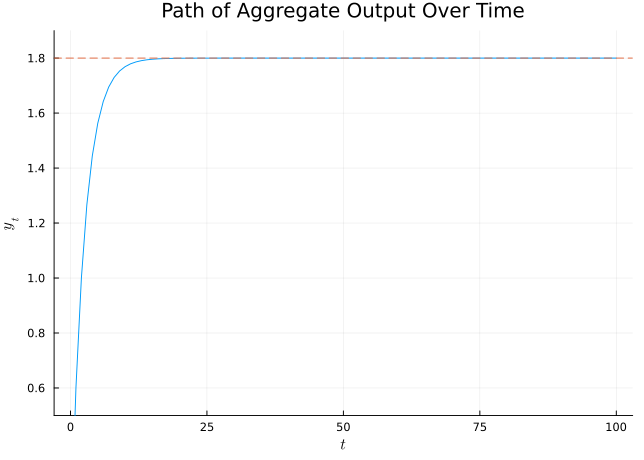

In [1]:
# modify the original code below

# Function that calculates a path of y
function calculate_y(i, b, g, T, y_init)
    y = zeros(T+1)
    y[1] = y_init
    for t = 2:(T+1)
        y[t] = b * y[t-1] + i + g
    end
  return y
end

# Initial values
i_0 = 0.3
g_0 = 0.3
b = 2/3 # proportion of income to consumption
y_init = 0
T = 100

plt = plot(0:T, calculate_y(i_0, b, g_0, T, y_init),
           title= "Path of Aggregate Output Over Time",
           ylim= (0.5, 1.9), xlabel = L"t", ylabel = L"y_t")
hline!([i_0 / (1 - b) + g_0 / (1 - b)], linestyle=:dash, seriestype="hline",
       legend = false)

### Part (b)

Redo the “Changing Consumption as a Fraction of Income” figure with the
random simulations by modifying the original code below

In [0]:
# modify the original code below:
# Changing fraction of consumption
bs = round.([1/3, 2/3, 5/6, 0.9], digits = 2)

plt = plot(title= "Changing Consumption as a Fraction of Income",
           xlabel = L"t", ylabel = L"y_t", legend = :topleft)
[plot!(plt, 0:T, calculate_y(i_0, b, g_0, T, y_init), label=L"b = %$b")
 for b in bs]
plt

### Part (c)

Redo the “An Increase in Investment on Output” and “An Increase in
Government Spending on Output” figures by modifying the original code
below

In [0]:
# modify the original code below:
x = 0:T
y_0 = calculate_y(i_0, b, g_0, T, y_init)
l = @layout [a ; b]

# Changing initial investment:
i_1 = 0.4
y_1 = calculate_y(i_1, b, g_0, T, y_init)
plt_1 = plot(x,y_0, label = L"i=0.3", linestyle= :dash,
             title= "An Increase in Investment on Output",
             xlabel = L"t", ylabel = L"y_t", legend = :bottomright)
plot!(plt_1, x, y_1, label = L"i=0.4")

# Changing government spending
g_1 = 0.4
y_1 = calculate_y(i_0, b, g_1, T, y_init)
plt_2 = plot(x,y_0, label = L"g=0.3", linestyle= :dash,
             title= "An Increase in Government Spending on Output",
             xlabel = L"t", ylabel = L"y_t", legend = :bottomright)
plot!(plt_2, x, y_1, label=L"g=0.4")
plot(plt_1, plt_2, layout = l)

Reusable functions, do not modify without clearly annotating your
changes.

In [1]:
# Iterates a function from an initial condition 
function iterate_map(f, x0, T)
    x = zeros(T + 1)
    x[1] = x0
    for t in 2:(T + 1)
        x[t] = f(x[t - 1])
    end
    return x
end

function plot45(f, xmin, xmax, x0, T; num_points = 100, label = L"h(k)",
                xlabel = "k", size = (600, 500))
    # Plot the function and the 45 degree line
    x_grid = range(xmin, xmax, num_points)
    plt = plot(x_grid, f.(x_grid); xlim = (xmin, xmax), ylim = (xmin, xmax),
               linecolor = :black, lw = 2, label, size)
    plot!(x_grid, x_grid; linecolor = :blue, lw = 2, label = nothing)

    # Iterate map and add ticks
    x = iterate_map(f, x0, T)
    if !isnothing(xlabel) && T > 1
      xticks!(x, [L"%$(xlabel)_{%$i}" for i in 0:T])
      yticks!(x, [L"%$(xlabel)_{%$i}" for i in 0:T])
    end

    # Plot arrows and dashes
    for i in 1:T
        plot!([x[i], x[i]], [x[i], x[i + 1]], arrow = :closed, linecolor = :black,
              alpha = 0.5, label = nothing)
        plot!([x[i], x[i + 1]], [x[i + 1], x[i + 1]], arrow = :closed,
              linecolor = :black, alpha = 0.5, label = nothing)
        plot!([x[i + 1], x[i + 1]], [0, x[i + 1]], linestyle = :dash,
              linecolor = :black, alpha = 0.5, label = nothing)
    end
    plot!([x[1], x[1]], [0, x[1]], linestyle = :dash, linecolor = :black,
          alpha = 0.5, label = nothing)
end


function ts_plot(f, x0, T; xlabel=L"t", label=L"k_t")
    x = iterate_map(f, x0, T)
    plot(0:T, x; xlabel, label)
    plot!(0:T, x; seriestype=:scatter, mc=:blue, alpha=0.7, label=nothing)
end

ts_plot (generic function with 1 method)

## Question 2

Take the Solow growth model in [our
lectures](https://jlperla.github.io/ECON408/lectures/deterministic_dynamics.html#/solow-growth-model)
with the code above.

In this question we will explore the depreciation parameter, $\delta$.
The baseline parameters are the same and given in the code below.

Recall that the steady state is

$$
k^* = \left(\frac{s A}{\delta}\right)^{1/(1-\alpha)}
$$

### Part (a)

With `k_0=0.25` use the `plot45` contrasting the `delta = 0.1` and
`delta = 0.001` to the existing `delta = 0.4`. The plots should be done
in separate cells. Adapt the range and domain as required.

In [1]:
h(k; p) = (1 / (1 + p.g_N)) * (
   p.s * p.z_bar * k^p.alpha
   + (1 - p.delta) * k)
k_bar(p) = (p.s * p.z_bar /
      (p.g_N + p.delta))^(1/(1-p.alpha))

p_baseline = (;z_bar = 2.0, s = 0.3, alpha = 0.3,
     delta = 0.4, g_N = 0.0)
k_0 = 0.25
k_min = 0.0
k_max = 3.0
T = 5

# add code here and new cells as required.

5

### Part (b)

Plot the time series with `ts_plot` for those same cases

In [1]:
k_0 = 0.25

p_baseline = (;z_bar = 2.0, s = 0.3, alpha = 0.3,
     delta = 0.4, g_N = 0.0)
k_min = 0.0
k_max = 4.0

# add code here and new cells as required.

4.0

### Part (c)

Can you interpret the results? What is happening as $\delta \to 0$ and
why?

(double click to edit your answer)

## Question 2

Take the Solow growth model in [our
lectures](https://jlperla.github.io/ECON408/lectures/deterministic_dynamics.html#/solow-growth-model)

In this question we will explore the $\alpha$ parameter. The baseline
parameters are the same and given in the code below.

### Part (a)

Find the new $k^*$ using the formula for the steady state for the case
of `alpha = 0.8` and `alpha = 0.99` contrasting with the `alpha = 0.3`
default. Hint: it might diverge

In [1]:
p_baseline = (;z_bar = 2.0, s = 0.3, alpha = 0.3,
     delta = 0.4, g_N = 0.0)
k_min = 0.0
k_max = 4.0
# Add code here

4.0

### Part (b)

Plot `ts_plot` and `plot45` for these cases, starting at `k_0=0.25` as
before for `alpha = 0.8` and `alpha = 0.99`. The plots should be done in
separate cells.

In [1]:
k_0 = 0.25
k_min = 0.0
k_max = 3.0
p_baseline = (;z_bar = 2.0, s = 0.3, alpha = 0.3,
     delta = 0.4, g_N = 0.0)
# Add code and create new cells as required

(z_bar = 2.0, s = 0.3, alpha = 0.3, delta = 0.4, g_N = 0.0)

### Part (c)

What is your interpretation? What is happening to the steady state and
convergence?

(double click to edit your answer)

### Part (d)

Now take the same case with `alpha=0.8` but now have a higher
depreciation rate, `delta=0.8`. Plot `ts_plot` and `plot45` as before

In [1]:
k_0 = 0.25
p_baseline = (;z_bar = 2.0, s = 0.3, alpha = 0.3,
     delta = 0.4, g_N = 0.0)  # for reference
# Add code and create new cells as required

(z_bar = 2.0, s = 0.3, alpha = 0.3, delta = 0.4, g_N = 0.0)

Try to guess what would happen as $\alpha \to 1$, and how it depends on
$\delta$.

(double click to edit your answer)